In [34]:
from N1 import Preprocessing,generate_preprocess_parameters

# define preprocess parameters
filepath='./data/heart.csv'
target='target'
multicategorical_features=['cp', 'restecg', 'slope', 'ca', 'thal']
continuous_features=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
anonymiser_feature_columns=['age','sex']
anonymiser_k=20

# generate preprocess parameters dict
preprocess_parameters=generate_preprocess_parameters(filepath,target,multicategorical_features,continuous_features,anonymiser_feature_columns,anonymiser_k)

# run preprocessing 
d1=Preprocessing(preprocess_parameters)

# print dataset anonymized
d1._dataset_original


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,1


In [35]:
d1._dataset_anonymized['age'].value_counts()

age
['34-54']    40
['62-76']    32
['64-77']    31
['42-46']    30
['52-54']    28
['58-59']    26
['47-51']    26
['55-57']    25
['55-61']    24
['60-63']    21
['29-41']    20
Name: count, dtype: int64

In [17]:
from N1 import Classification
from sklearn.neighbors import KNeighborsClassifier

# choose model classifier
knn = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

# run Classification with preprocess parameters and model classifier 
knn_clf=Classification(d1.preprocess_dataset,knn)

# print results
knn_clf.results()

,conf_matrix,precision,recall,accuracy,f1
"KNeighborsClassifier(n_jobs=-1, n_neighbors=15)","[[41, 3], [7, 40]]",0.930233,0.851064,0.89011,0.888889


In [18]:
# GRID SEARCH
from N1 import generate_gs_preprocess_parameters

# define permanent preprocess parameters
filepath='./data/heart.csv'
target='target'
multicategorical_features=['cp', 'restecg', 'slope', 'ca', 'thal']
continuous_features=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
anonymiser_feature_columns=['age','sex']

# define grid-search preprocess parameters
gs_parameters={'anonymiser_k':[None,1,5,10,20,50,100,200,302]}

# generate preprocess parameters dict fro grid-search
gs_preprocess_parameters=generate_gs_preprocess_parameters(gs_parameters,filepath,target,multicategorical_features,continuous_features,
                                                           anonymiser_feature_columns)

In [19]:
# GRID SEARCH
from N1 import GridSearch
from sklearn.neighbors import KNeighborsClassifier

# choose model classifier
knn = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

# run Grid Search with preprocess parameters and model classifier 
gs_knn=GridSearch(gs_preprocess_parameters,knn)

# print results
gs_knn.results()

,conf_matrix,precision,recall,accuracy,f1
None,"[[38, 6], [10, 37]]",0.860465,0.787234,0.824176,0.822222
1,"[[42, 2], [9, 38]]",0.95,0.808511,0.879121,0.873563
5,"[[42, 2], [9, 38]]",0.95,0.808511,0.879121,0.873563
10,"[[40, 4], [4, 43]]",0.914894,0.914894,0.912088,0.914894
20,"[[43, 1], [1, 46]]",0.978723,0.978723,0.978022,0.978723
50,"[[42, 2], [2, 45]]",0.957447,0.957447,0.956044,0.957447
100,"[[40, 4], [0, 47]]",0.921569,1.0,0.956044,0.959184
200,"[[41, 3], [10, 37]]",0.925,0.787234,0.857143,0.850575
302,"[[41, 3], [10, 37]]",0.925,0.787234,0.857143,0.850575


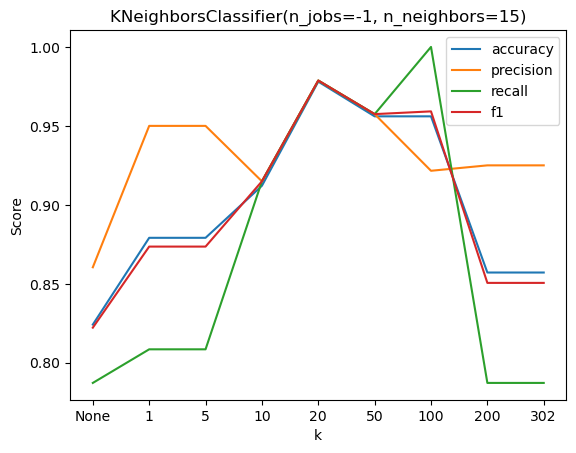

In [20]:
# print graphs
gs_knn.plot_results()

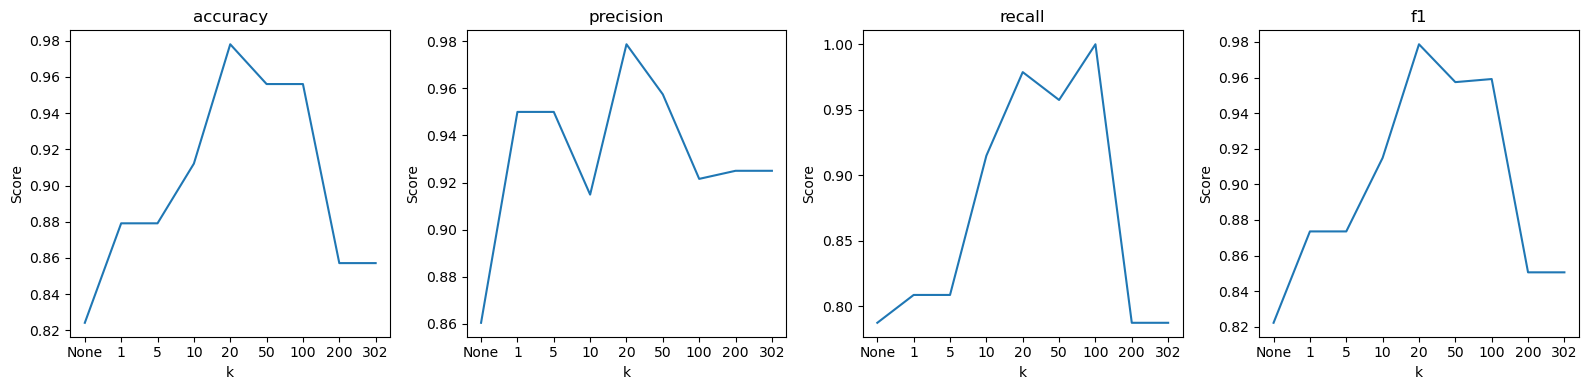

In [21]:
gs_knn.plot_results_2()

In [22]:
# GRID SEARCH
from N1 import GridSearch
from sklearn.tree import DecisionTreeClassifier

# choose model classifier
clf=DecisionTreeClassifier(max_depth=3)

# run Grid Search with preprocess parameters and model classifier 
gs_clf=GridSearch(gs_preprocess_parameters,clf)

# print results
gs_clf.results()

,conf_matrix,precision,recall,accuracy,f1
None,"[[40, 4], [11, 36]]",0.9,0.765957,0.835165,0.827586
1,"[[43, 1], [6, 41]]",0.97619,0.87234,0.923077,0.921348
5,"[[44, 0], [8, 39]]",1.0,0.829787,0.912088,0.906977
10,"[[44, 0], [2, 45]]",1.0,0.957447,0.978022,0.978261
20,"[[44, 0], [2, 45]]",1.0,0.957447,0.978022,0.978261
50,"[[42, 2], [2, 45]]",0.957447,0.957447,0.956044,0.957447
100,"[[40, 4], [0, 47]]",0.921569,1.0,0.956044,0.959184
200,"[[41, 3], [10, 37]]",0.925,0.787234,0.857143,0.850575
302,"[[41, 3], [10, 37]]",0.925,0.787234,0.857143,0.850575


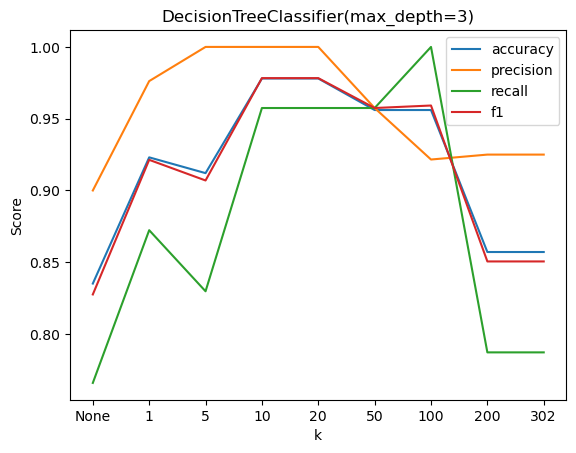

In [23]:
# print graphs
gs_clf.plot_results()

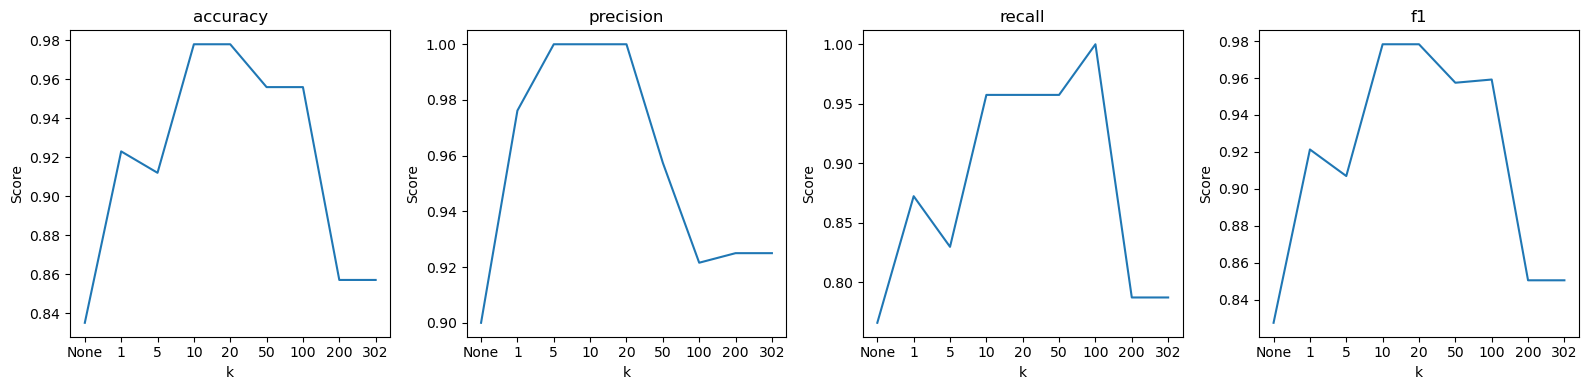

In [24]:
gs_clf.plot_results_2()

In [25]:
# GRID SEARCH
from N1 import GridSearch
from sklearn.ensemble import RandomForestClassifier

# choose model classifier
rf_clf=RandomForestClassifier()

# run Grid Search with preprocess parameters and model classifier 
gs_rf_clf=GridSearch(gs_preprocess_parameters,rf_clf)

# print results
gs_rf_clf.results()

,conf_matrix,precision,recall,accuracy,f1
None,"[[40, 4], [12, 35]]",0.897436,0.744681,0.824176,0.813953
1,"[[43, 1], [7, 40]]",0.97561,0.851064,0.912088,0.909091
5,"[[44, 0], [8, 39]]",1.0,0.829787,0.912088,0.906977
10,"[[44, 0], [2, 45]]",1.0,0.957447,0.978022,0.978261
20,"[[44, 0], [2, 45]]",1.0,0.957447,0.978022,0.978261
50,"[[42, 2], [2, 45]]",0.957447,0.957447,0.956044,0.957447
100,"[[40, 4], [0, 47]]",0.921569,1.0,0.956044,0.959184
200,"[[41, 3], [10, 37]]",0.925,0.787234,0.857143,0.850575
302,"[[41, 3], [10, 37]]",0.925,0.787234,0.857143,0.850575


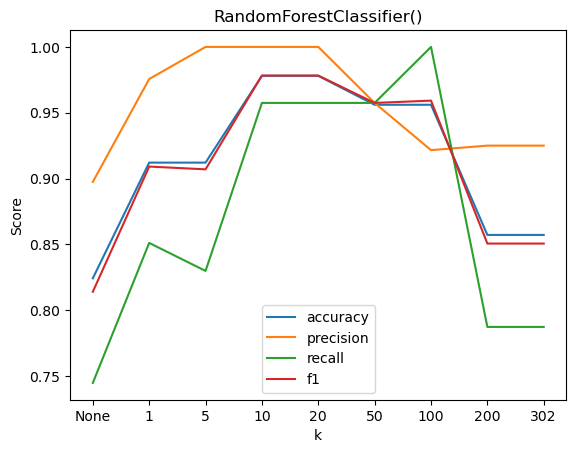

In [26]:
gs_rf_clf.plot_results()

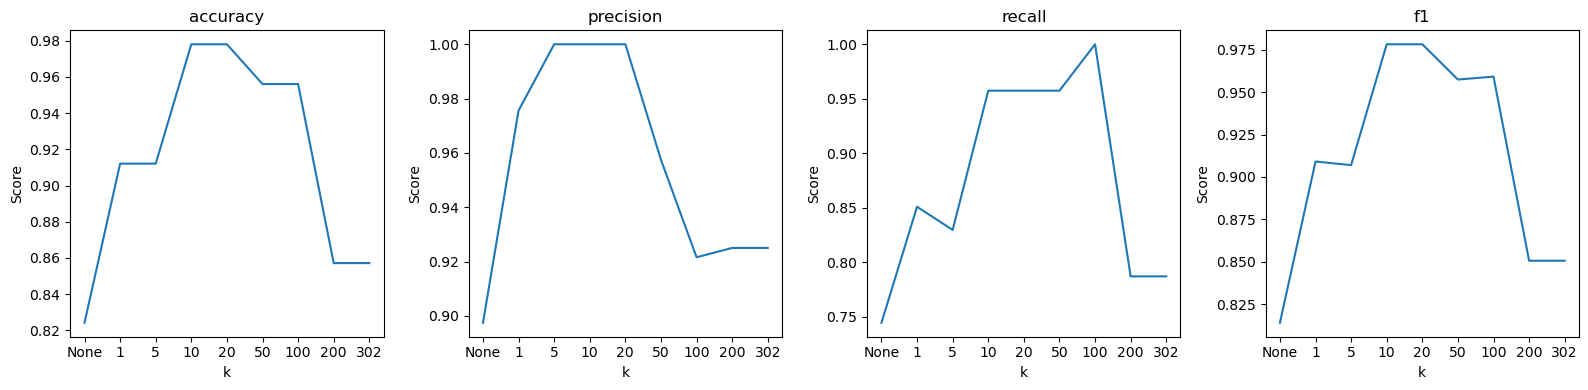

In [27]:
gs_rf_clf.plot_results_2()